IMPORTING ESSENTIAL LIBRARIES


In [45]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

LOADING THE DATASET

In [5]:
co2_data=pd.read_csv("co2.csv")

In [7]:
co2_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [17]:
x1_x2=co2_data[["ENGINESIZE","CYLINDERS"]]
y=co2_data["CO2EMISSIONS"]
print(x1_x2.head())
y.head()

   ENGINESIZE  CYLINDERS
0         2.0          4
1         2.4          4
2         1.5          4
3         3.5          6
4         3.5          6


0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

TRAIN TEST SPLITT

In [19]:
true=np.random.rand(len(x1_x2))>0.8
train_x1_x2=x1_x2[true]
test_x1_x2=x1_x2[~true]
train_y=y[true]
test_y=y[~true]

In [22]:
train_y.head()

8     267
9     212
11    239
13    359
20    230
Name: CO2EMISSIONS, dtype: int64

DATA VISUALISATION


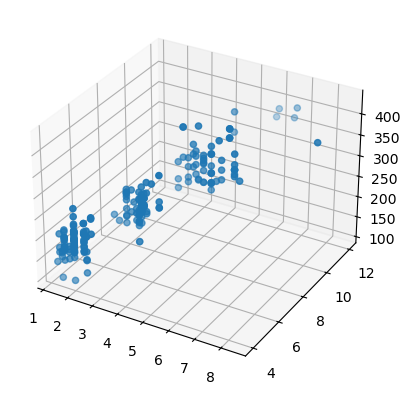

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(train_x1_x2["ENGINESIZE"],train_x1_x2["CYLINDERS"],train_y)

In [27]:
model=LinearRegression()

In [34]:
model.fit(train_x1_x2[["ENGINESIZE","CYLINDERS"]],train_y)
predicted_y=model.predict(test_x1_x2)

In [32]:
model.coef_

array([26.87823384, 10.78035071])

In [33]:
model.intercept_

105.31155395444742

MODEL VISUALISATION

C:\Users\Sathish\ML - 2\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


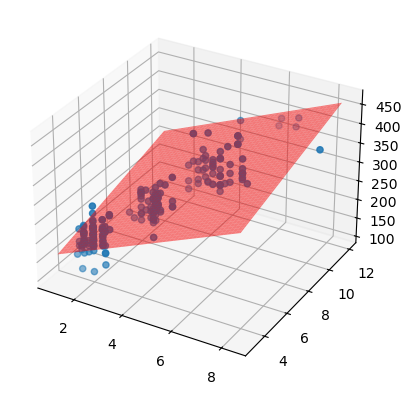

In [44]:
figg=plt.figure()
axx=figg.add_subplot(111,projection="3d")
axx.scatter(train_x1_x2["ENGINESIZE"],train_x1_x2["CYLINDERS"],train_y)

x_surf = np.linspace(test_x1_x2["ENGINESIZE"].min(), test_x1_x2["ENGINESIZE"].max(), 100)
y_surf = np.linspace(test_x1_x2["CYLINDERS"].min(), test_x1_x2["CYLINDERS"].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)

axx.plot_surface(x_surf, y_surf, z_surf,color="r" , alpha=0.5, label='Predicted CO2 Emissions Surface')
plt.show()


MODEL EVALUATION

R2 SQUARED ERROR


In [53]:
error=r2_score(test_y,predicted_y)
print(error)

0.7762521071508298
